In [1]:
import numpy as np
import pandas as pf
import matplotlib.pyplot as plt

In [2]:
def getData(n):#n - 类别数量
    X,y = [],[]
    cov = np.array([[20,0],[0,20]])
    size = 100
    
    for i in range(n):
        mean = np.random.uniform(-100,100,2)
        X.append(np.random.multivariate_normal(mean,cov,size))
        y.extend([i]*size)
    X = np.array(X).reshape((n*size,2))
    y = np.array(y)
    return X,y
    

In [3]:
def Homogenization(X):
    one = np.ones(len(X))
    X = np.insert(X,2,values = one,axis = 1)
    return X

In [4]:
#感知器模型
def Perception(X_train,y_train,max_iter_num = 1000):
    X_train = Homogenization(X_train)
    kindNum = len(np.unique(y_train))
    w = np.zeros((kindNum,3))
    
    isConverge = False
    while(not isConverge and max_iter_num > 0):
        isConverge = True
        for i in range(len(y_train)):
            x = X_train[i]
            y = y_train[i]
            for j in range(kindNum):
                if i == j:
                    continue
                if np.dot(w[y],x) <= np.dot(w[j],x):
                    isConverge = False
                    w[y] = w[y] + x
                    w[j] = w[j] - x
        max_iter_num = max_iter_num - 1
    return w
    

In [5]:
def checkTest(w,X_test,y_test):
    fig1 = plt.figure('Figure1').add_subplot(111)
    fig1.set_title("Test set classification results")
    
    colors = ('red','blue','lightgreen','gray','cyan','yellow','green','black')
    
    X_test = Homogenization(X_test)
    correctNum = 0
    
    for i in range(len(X_test)):
        kind = 0
        maxValue = np.dot(w[0],X_test[i])
        for j in range(1,len(w)):
            nowValue = np.dot(w[j],X_test[i])
            if nowValue > maxValue:
                maxValue = nowValue
                kind = j
        if kind == y_test[i]:
            correctNum = correctNum + 1
        #画一个点
        fig1.scatter(X_test[i][0],X_test[i][1],c = colors[kind])
    return correctNum / len(X_test)

In [6]:
def draw_w_line(X_train,w):
    x_min,x_max = X_train[:,0].min()-1,X_train[:,0].max()+1
    y_min,y_max = X_train[:,1].min()-1,X_train[:,1].max()+1
    
    fig2 = plt.figure('Figure2').add_subplot(111)
    fig2.set_title("Training_Set")
    fig2.set_xlim(x_min,x_max)
    fig2.set_ylim(y_min,y_max)
    
    fig2.scatter(X[:,0],X[:,1])
    x = np.linspace(x_min,x_max,1000)
    for i in range(len(w)):#每个列别画一条线性判别线
        fig2.plot(x,-(w[i][0]*x+w[i][2])/w[i][1])
    return None
    

权重:
 [[-2060.71693403   945.61932464   529.        ]
 [-1898.66563273  1230.63984086  -503.        ]
 [ 1581.55665316  -262.20136896   -48.        ]
 [ 2551.02671225 -2717.69307925    40.        ]
 [ -289.29627028  1095.03530128  -481.        ]
 [ 3620.93513185 -1490.54129029   -63.        ]
 [-2496.02015726  -115.54893835  -426.        ]
 [-1008.81950296  1314.69021006   952.        ]]
准确率: 0.83


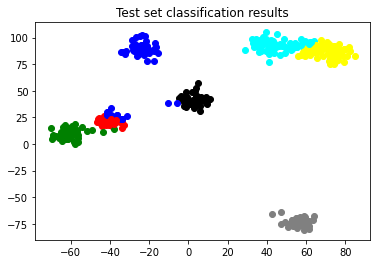

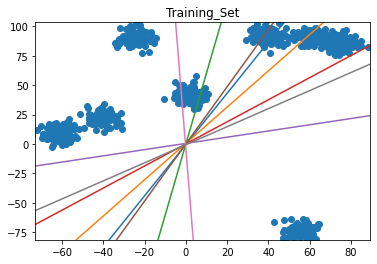

In [7]:
X,y = getData(8)#分8类
X_train,y_train = X[::2],y[::2]
X_test,y_test = X[1::2],y[1::2]

w = Perception(X_train,y_train)
print("权重:\n",w)

correctRate = checkTest(w,X_test,y_test)
draw_w_line(X_train,w)
print("准确率:",correctRate)